In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [4]:
df.shape

(374, 13)

In [5]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [7]:
# one, sparse nominal/ordinal, mapping, feature selection, selectkbest

In [8]:
df['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

Mapping (Manually do it but can be a problem in terms of too many categories)

In [9]:
mapping = {'None':0, 'Sleep Apnea':1, 'Insomnia':2}

df['Sleep Disorder'] = df['Sleep Disorder'].map(mapping)
# We were able to do mapping because there were only 3 features in the column

In [10]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,1
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,1
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,1
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,1
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,1


In [11]:
df.Occupation.value_counts() # Inefficient to do mapping because of so many features in the column

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

# One Hot Encoding (Sparse Matrix) Using Sklearn
This creates a binary column for each category and returns a sparse matrix or dense array (depending on the sparse_output parameter)

Sparse Matrix - Matrix with more zeros

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
ohe = OneHotEncoder(drop='first') # useful in situations where perfectly collinear features cause problems, such as when feeding the resulting data into an unregularized linear regression model.
# However, dropping one category breaks the symmetry of the original representation and can therefore induce a bias in downstream models, 
# for instance for penalized linear classification or regression models.
ar = ohe.fit_transform(df[['Gender']]).toarray()
# shows one single feature


In [14]:
ar

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [15]:
gender_encoded = pd.DataFrame(ar, columns=ohe.get_feature_names(['Gender']))

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
gender_encoded.index = df.index


In [17]:
df = pd.concat([df, gender_encoded], axis=1)


In [18]:
df.drop('Gender', axis=1, inplace=True)


In [19]:
df

,Person ID,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Gender_Male
0,1,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,0,1.0
1,2,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0,1.0
2,3,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0,1.0
3,4,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,1,1.0
4,5,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,1,0.0
370,371,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,1,0.0
371,372,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,1,0.0
372,373,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,1,0.0


# Label Encoder ( Without creating Sparse Matrix) 

In [20]:
df['Blood Pressure'].value_counts()

130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
132/87     3
128/85     3
126/83     2
115/78     2
139/91     2
142/92     2
119/77     2
135/88     2
129/84     2
128/84     2
131/86     2
117/76     2
130/86     2
118/75     2
121/79     1
122/80     1
118/76     1
Name: Blood Pressure, dtype: int64

In [21]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

In [22]:
df['Systolic']= df['Systolic'].astype('int')

In [23]:
df['Diastolic']= df['Diastolic'].astype('int')

In [24]:
df.drop('Blood Pressure',axis=1,inplace=True)

In [25]:
df

,Person ID,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Gender_Male,Systolic,Diastolic
0,1,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,0,1.0,126,83
1,2,28,Doctor,6.2,6,60,8,Normal,75,10000,0,1.0,125,80
2,3,28,Doctor,6.2,6,60,8,Normal,75,10000,0,1.0,125,80
3,4,28,Sales Representative,5.9,4,30,8,Obese,85,3000,1,1.0,140,90
4,5,28,Sales Representative,5.9,4,30,8,Obese,85,3000,1,1.0,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,59,Nurse,8.1,9,75,3,Overweight,68,7000,1,0.0,140,95
370,371,59,Nurse,8.0,9,75,3,Overweight,68,7000,1,0.0,140,95
371,372,59,Nurse,8.1,9,75,3,Overweight,68,7000,1,0.0,140,95
372,373,59,Nurse,8.1,9,75,3,Overweight,68,7000,1,0.0,140,95


In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()

In [28]:

df['Occupation'] = le.fit_transform(df['Occupation'])
df['BMI Category'] = le.fit_transform(df['BMI Category'])
#df['Sleep Disorder'] = le.fit_transform(df['Sleep Disorder'])

In [29]:
df

,Person ID,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Gender_Male,Systolic,Diastolic
0,1,27,9,6.1,6,42,6,3,77,4200,0,1.0,126,83
1,2,28,1,6.2,6,60,8,0,75,10000,0,1.0,125,80
2,3,28,1,6.2,6,60,8,0,75,10000,0,1.0,125,80
3,4,28,6,5.9,4,30,8,2,85,3000,1,1.0,140,90
4,5,28,6,5.9,4,30,8,2,85,3000,1,1.0,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,59,5,8.1,9,75,3,3,68,7000,1,0.0,140,95
370,371,59,5,8.0,9,75,3,3,68,7000,1,0.0,140,95
371,372,59,5,8.1,9,75,3,3,68,7000,1,0.0,140,95
372,373,59,5,8.1,9,75,3,3,68,7000,1,0.0,140,95


Creating X and y, independent and dependent feature

In [30]:
df_dropped = df.drop('Sleep Disorder', axis=1)
X = df_dropped.iloc[:, :]

y = df['Sleep Disorder']

In [31]:
X

,Person ID,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Gender_Male,Systolic,Diastolic
0,1,27,9,6.1,6,42,6,3,77,4200,1.0,126,83
1,2,28,1,6.2,6,60,8,0,75,10000,1.0,125,80
2,3,28,1,6.2,6,60,8,0,75,10000,1.0,125,80
3,4,28,6,5.9,4,30,8,2,85,3000,1.0,140,90
4,5,28,6,5.9,4,30,8,2,85,3000,1.0,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,59,5,8.1,9,75,3,3,68,7000,0.0,140,95
370,371,59,5,8.0,9,75,3,3,68,7000,0.0,140,95
371,372,59,5,8.1,9,75,3,3,68,7000,0.0,140,95
372,373,59,5,8.1,9,75,3,3,68,7000,0.0,140,95


In [32]:
y

0      0
1      0
2      0
3      1
4      1
      ..
369    1
370    1
371    1
372    1
373    1
Name: Sleep Disorder, Length: 374, dtype: int64

# Feature Selection
Implementing chi-square test 

In [33]:
# Find which features are most impactful
from sklearn.feature_selection import SelectKBest # How many features we can select
from sklearn.feature_selection import chi2 # basis to select features

In [34]:
ordered_rank_features = SelectKBest(score_func=chi2, k=13) # Score collected based on chi2
ordered_feature = ordered_rank_features.fit(X,y) # Supervised method because includes independent and dependent features

In [35]:
ordered_feature.scores_

array([5.29124496e+03, 1.59279471e+02, 3.38329511e+02, 4.85994464e+00,
       9.46484086e+00, 5.25871854e+02, 7.49771560e+00, 3.74767752e+02,
       1.37140130e+01, 1.68769106e+04, 2.68626035e+01, 9.34253838e+01,
       9.88767628e+01])

In [36]:
len(ordered_feature.scores_)

13

In [37]:
feature_score = pd.DataFrame(ordered_feature.scores_,columns=['Feature_score'])

In [38]:
cols = pd.DataFrame(X.columns)

In [39]:
feature_rank = pd.concat([cols,feature_score], axis=1)

In [40]:
feature_rank.columns=['Features','Score']

In [41]:
feature_rank # unordered

,Features,Score
0,Person ID,5291.244961
1,Age,159.279471
2,Occupation,338.329511
3,Sleep Duration,4.859945
4,Quality of Sleep,9.464841
5,Physical Activity Level,525.871854
6,Stress Level,7.497716
7,BMI Category,374.767752
8,Heart Rate,13.714013
9,Daily Steps,16876.910595


In [42]:
feature_rank.nlargest(13,'Score') # ordered

,Features,Score
9,Daily Steps,16876.910595
0,Person ID,5291.244961
5,Physical Activity Level,525.871854
7,BMI Category,374.767752
2,Occupation,338.329511
1,Age,159.279471
12,Diastolic,98.876763
11,Systolic,93.425384
10,Gender_Male,26.862604
8,Heart Rate,13.714013


Implementing Ensemble Learning

In [43]:
from sklearn.ensemble import ExtraTreesClassifier 
# extra - mutual information based feature importance calcuation

In [44]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [45]:
print(model.feature_importances_)

[0.2025878  0.04514106 0.0695634  0.06135763 0.0396226  0.0486474
 0.03249207 0.15124891 0.02964696 0.04755312 0.01822495 0.1208175
 0.13309661]


In [46]:
ranked_features = pd.Series(model.feature_importances_,index = X.columns)

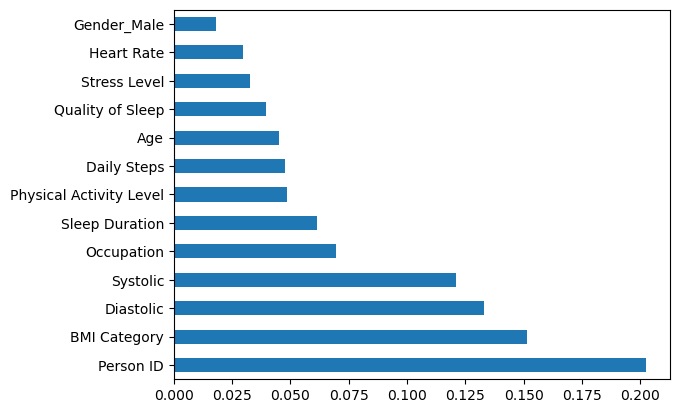

In [47]:
ranked_features.nlargest(13).plot(kind='barh')
plt.show()

# Pearson Correlation
Drops the correlated features to avoid biases

In [48]:
print(df.corr())

                         Person ID       Age  Occupation  Sleep Duration  \
Person ID                 1.000000  0.990516    0.269343        0.296305   
Age                       0.990516  1.000000    0.231188        0.344709   
Occupation                0.269343  0.231188    1.000000       -0.325775   
Sleep Duration            0.296305  0.344709   -0.325775        1.000000   
Quality of Sleep          0.431612  0.473734   -0.278071        0.883213   
Physical Activity Level   0.149882  0.178993   -0.103660        0.212360   
Stress Level             -0.394287 -0.422344    0.021123       -0.811023   
BMI Category              0.527614  0.511329    0.699504       -0.376358   
Heart Rate               -0.225467 -0.225606    0.043928       -0.516455   
Daily Steps               0.043844  0.057973   -0.105877       -0.039533   
Sleep Disorder            0.341406  0.303962    0.600787       -0.382045   
Gender_Male              -0.584229 -0.596358   -0.219113       -0.121579   
Systolic    

In [49]:
#len(df.corr())

<AxesSubplot:>

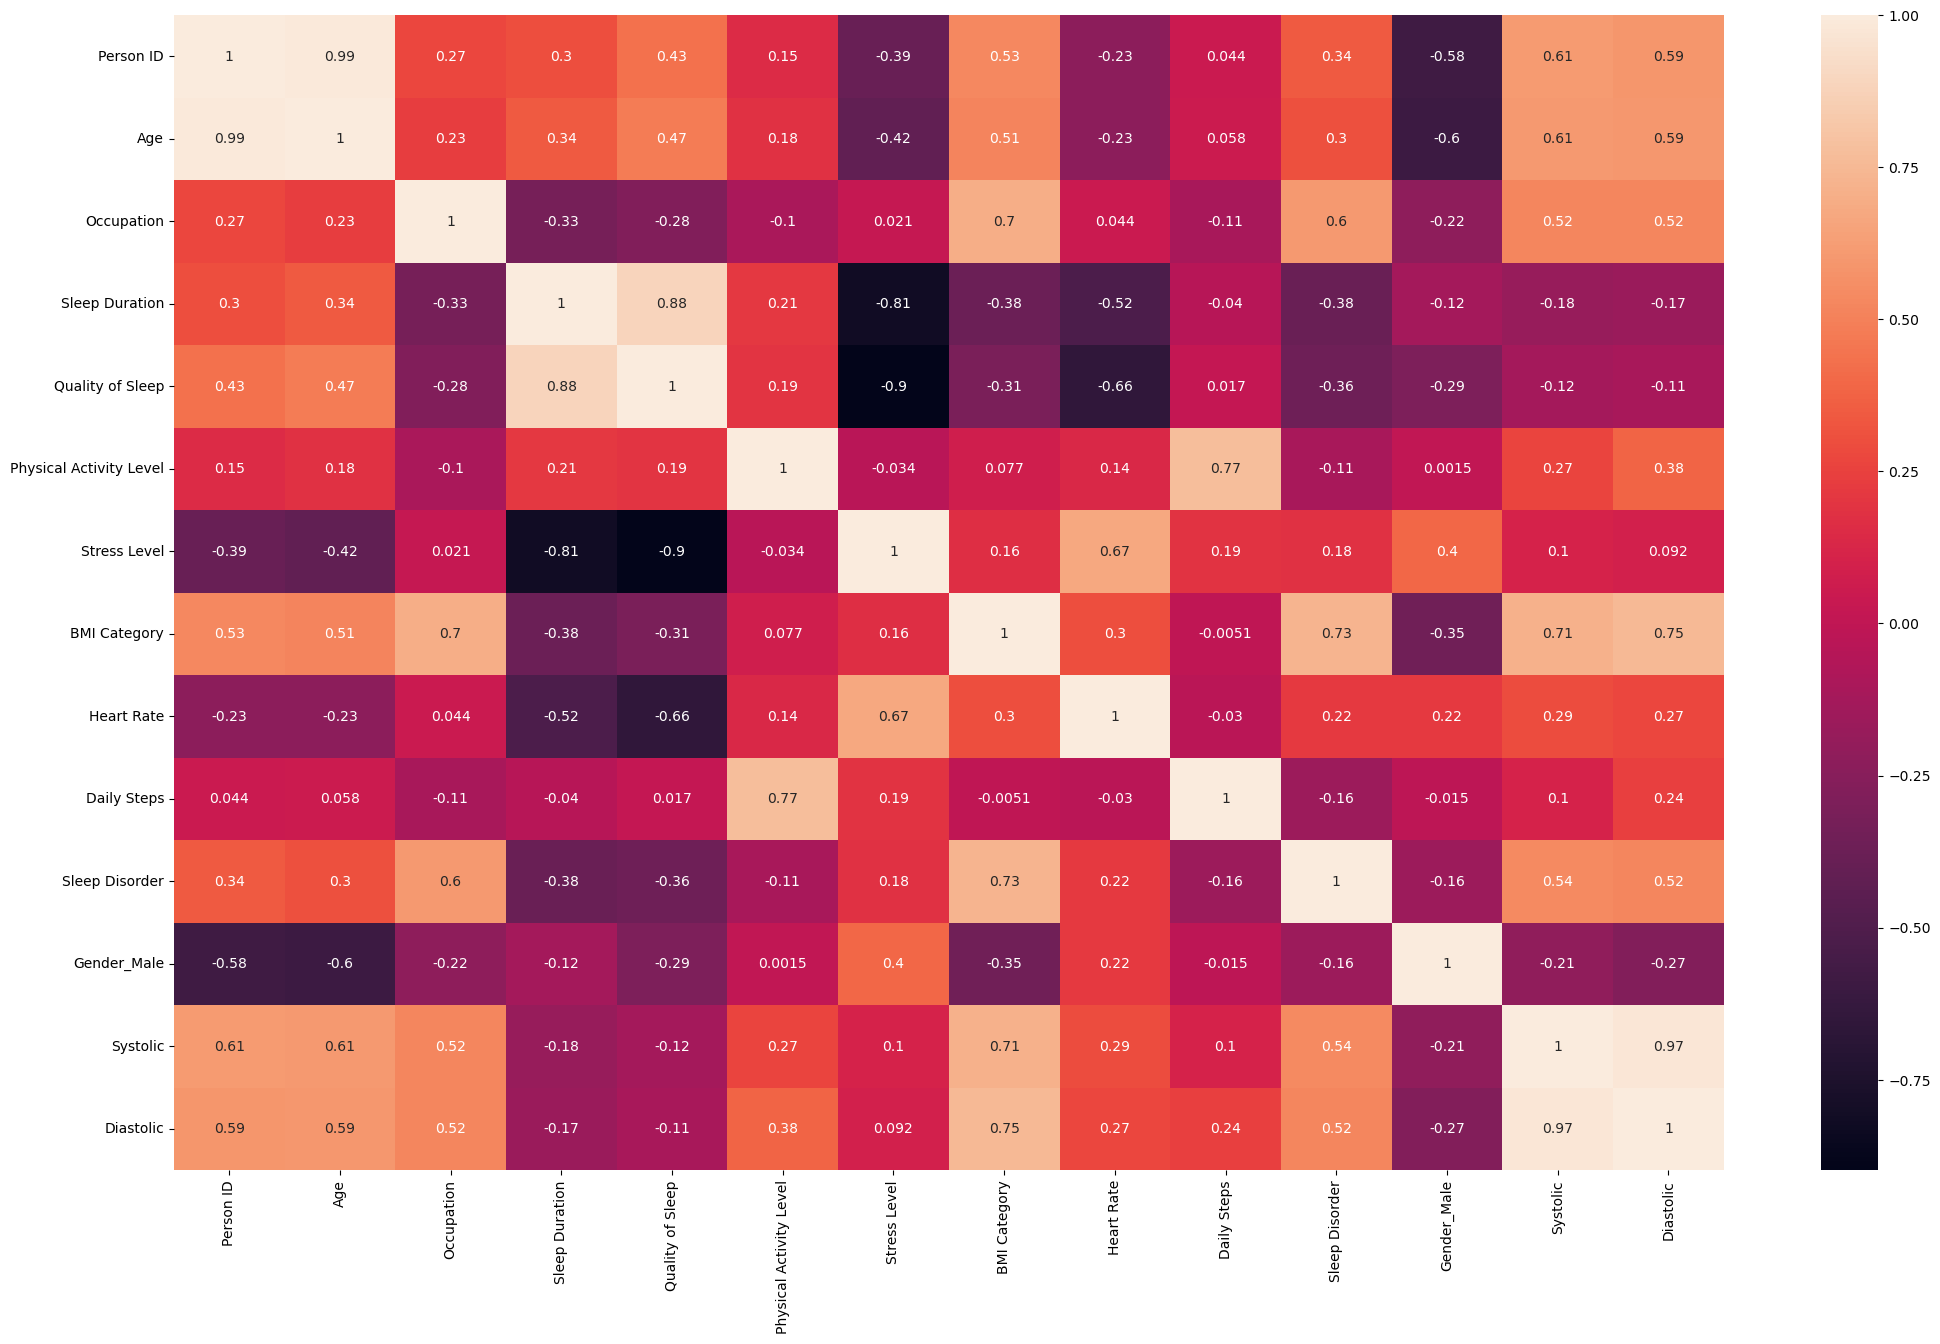

In [50]:
top_features = df.corr().index
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True)

# From the heatmap - Stress Level & Sleep Duration is correlated
# which is 0.81

The features which are highly correlated can be removed because it contains kind of similar information about data

In [51]:
# df_dropped = df.drop('Sleep Disorder', axis=1)
# X = df_dropped.iloc[:, :]

# y = df['Sleep Disorder']

In [52]:
from sklearn.model_selection import train_test_split # Prevents from overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# All the correlation will be done in the training dataset

In [53]:
X_train.shape

(261, 13)

In [54]:
X_test.shape

(113, 13)

In [55]:
# With the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature


def correlation(dataset, threshold): # takes X_train dataset, threshold = how much percentage is correlated
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)): # iterate through all of the corr matrix
        for j in range(i):
            if(abs(corr_matrix.iloc[i,j]) > threshold): # we are interested in absolute coeff value
                col_name = corr_matrix.columns[i] # getting the name of the column
                col_corr.add(col_name)
    return col_corr

In [56]:
# To avoid overfitting, we will only apply the function in X_train
corr_features = correlation(X_train,0.9) # dataset = X_train, threshold = 0.8

In [57]:
(len(set(corr_features))) # number of correlated features

2

In [58]:
corr_features

{'Age', 'Diastolic'}

In [59]:
X_train

,Person ID,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Gender_Male,Systolic,Diastolic
155,156,39,3,7.2,8,60,5,0,68,8000,1.0,130,85
113,114,37,3,7.4,8,60,5,0,68,8000,1.0,130,85
159,160,39,3,7.2,8,60,5,0,68,8000,1.0,130,85
317,318,53,2,8.5,9,30,3,0,65,5000,0.0,125,80
114,115,37,0,7.2,8,60,4,0,68,7000,0.0,115,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,324,53,2,8.5,9,30,3,0,65,5000,0.0,125,80
192,193,43,7,6.5,6,45,7,3,72,6000,1.0,130,85
117,118,37,0,7.2,8,60,4,0,68,7000,0.0,115,75
47,48,31,1,7.8,7,75,6,0,70,8000,1.0,120,80


In [60]:
X_test

,Person ID,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Gender_Male,Systolic,Diastolic
122,123,37,0,7.2,8,60,4,0,68,7000,0.0,115,75
295,296,50,5,6.0,6,90,8,3,75,10000,0.0,140,95
311,312,52,0,6.6,7,45,7,3,72,6000,0.0,130,85
210,211,43,2,7.7,8,90,5,0,70,8000,1.0,130,85
204,205,43,2,7.6,8,75,4,3,68,6800,1.0,122,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,335,54,2,8.4,9,30,3,0,65,5000,0.0,125,80
302,303,51,5,7.1,7,55,6,1,72,6000,0.0,125,82
324,325,53,2,8.3,9,30,3,0,65,5000,0.0,125,80
17,18,29,1,6.0,6,30,8,0,70,8000,1.0,120,80


In [61]:
X_train.drop(corr_features, axis = 1)

,Person ID,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Gender_Male,Systolic
155,156,3,7.2,8,60,5,0,68,8000,1.0,130
113,114,3,7.4,8,60,5,0,68,8000,1.0,130
159,160,3,7.2,8,60,5,0,68,8000,1.0,130
317,318,2,8.5,9,30,3,0,65,5000,0.0,125
114,115,0,7.2,8,60,4,0,68,7000,0.0,115
...,...,...,...,...,...,...,...,...,...,...,...
323,324,2,8.5,9,30,3,0,65,5000,0.0,125
192,193,7,6.5,6,45,7,3,72,6000,1.0,130
117,118,0,7.2,8,60,4,0,68,7000,0.0,115
47,48,1,7.8,7,75,6,0,70,8000,1.0,120


In [62]:
X_test.drop(corr_features, axis = 1)

,Person ID,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Gender_Male,Systolic
122,123,0,7.2,8,60,4,0,68,7000,0.0,115
295,296,5,6.0,6,90,8,3,75,10000,0.0,140
311,312,0,6.6,7,45,7,3,72,6000,0.0,130
210,211,2,7.7,8,90,5,0,70,8000,1.0,130
204,205,2,7.6,8,75,4,3,68,6800,1.0,122
...,...,...,...,...,...,...,...,...,...,...,...
334,335,2,8.4,9,30,3,0,65,5000,0.0,125
302,303,5,7.1,7,55,6,1,72,6000,0.0,125
324,325,2,8.3,9,30,3,0,65,5000,0.0,125
17,18,1,6.0,6,30,8,0,70,8000,1.0,120


# Logistic Regression


Using Standardization technique allows the features to be transformed in a way that it will have the properties of a standard normal distribution with mean = 0 and standard deviation = 1

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler=StandardScaler()

In [65]:
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data because it scales

In [66]:
X_test_scaled = scaler.transform(X_test)  # Only transform on test data

In [67]:
X_train_scaled

array([[-0.32278458, -0.4033423 , -0.26657441, ...,  1.01934415,
         0.15763171,  0.02467088],
       [-0.71567427, -0.63598836, -0.26657441, ...,  1.01934415,
         0.15763171,  0.02467088],
       [-0.28536652, -0.4033423 , -0.26657441, ...,  1.01934415,
         0.15763171,  0.02467088],
       ...,
       [-0.67825621, -0.63598836, -1.2558055 , ..., -0.98102294,
        -1.77693925, -1.58510421],
       [-1.33307236, -1.33392653, -0.9260618 , ...,  1.01934415,
        -1.13208226, -0.78021666],
       [-0.1637578 , -0.17069624, -0.26657441, ...,  1.01934415,
         0.15763171,  0.02467088]])

In [68]:
X_test_scaled

array([[-0.63148363, -0.63598836, -1.2558055 , ..., -0.98102294,
        -1.77693925, -1.58510421],
       [ 0.98684773,  0.87621101,  0.39291299, ..., -0.98102294,
         1.44734568,  1.63444598],
       [ 1.13651999,  1.10885706, -1.2558055 , ..., -0.98102294,
         0.15763171,  0.02467088],
       ...,
       [ 1.25812871,  1.22518009, -0.5963181 , ..., -0.98102294,
        -0.48722528, -0.78021666],
       [-1.61370786, -1.56657258, -0.9260618 , ...,  1.01934415,
        -1.13208226, -0.78021666],
       [ 1.04297483,  0.99253404, -0.5963181 , ..., -0.98102294,
        -0.48722528, -0.78021666]])

In [69]:
# Check if columns are the same and in the same order
print(X_train.columns)
print(X_test.columns)

Index(['Person ID', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Gender_Male', 'Systolic', 'Diastolic'],
      dtype='object')
Index(['Person ID', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Gender_Male', 'Systolic', 'Diastolic'],
      dtype='object')


In [85]:
X_test.sample()

,Person ID,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Gender_Male,Systolic,Diastolic
144,145,38,3,7.1,8,60,5,0,68,8000,1.0,130,85


In [86]:
# This part is used after saving the models
p = np.array(X_test.sample())

In [87]:
print(p)

[[3.7e+02 5.9e+01 5.0e+00 8.1e+00 9.0e+00 7.5e+01 3.0e+00 3.0e+00 6.8e+01
  7.0e+03 0.0e+00 1.4e+02 9.5e+01]]


In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
#logmodel = LogisticRegression(max_iter=1000)
#logmodel.fit(X_train,y_train)

In [73]:
logmodel = LogisticRegression(class_weight='balanced', max_iter=10000)

# Convergance issue, maximum iterations reached issue, solver

In [74]:
logmodel.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

# Predictions and Evaluations

Create a classification report for the model

In [75]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = logmodel.predict(X_test_scaled)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        66
           1       0.83      0.83      0.83        24
           2       0.69      0.78      0.73        23

    accuracy                           0.85       113
   macro avg       0.82      0.83      0.82       113
weighted avg       0.86      0.85      0.85       113

[[58  1  7]
 [ 3 20  1]
 [ 2  3 18]]


Saving the model

In [81]:
import pickle

In [82]:
filename = 'Sleep_Health_Lifestyle Preprocessing.sav'
pickle.dump(logmodel, open(filename, 'wb'))

In [83]:
loaded_model =pickle.load(open('Sleep_Health_Lifestyle Preprocessing.sav','rb'))

In [84]:
loaded_model

LogisticRegression(class_weight='balanced', max_iter=10000)

In [88]:
predictions = logmodel.predict(p)

In [89]:
predictions

array([1])